<a href="https://colab.research.google.com/github/NabilaAisha/Nasha.github.io/blob/main/Assignment_4_Nabila_Aisha_084_Kompi_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pandas_profiling
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=f32dfd79aebab4f5391ab95b321e8b810eafc371d06e96

<ipython-input-2-44f7874eef9e>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Pre Processing**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


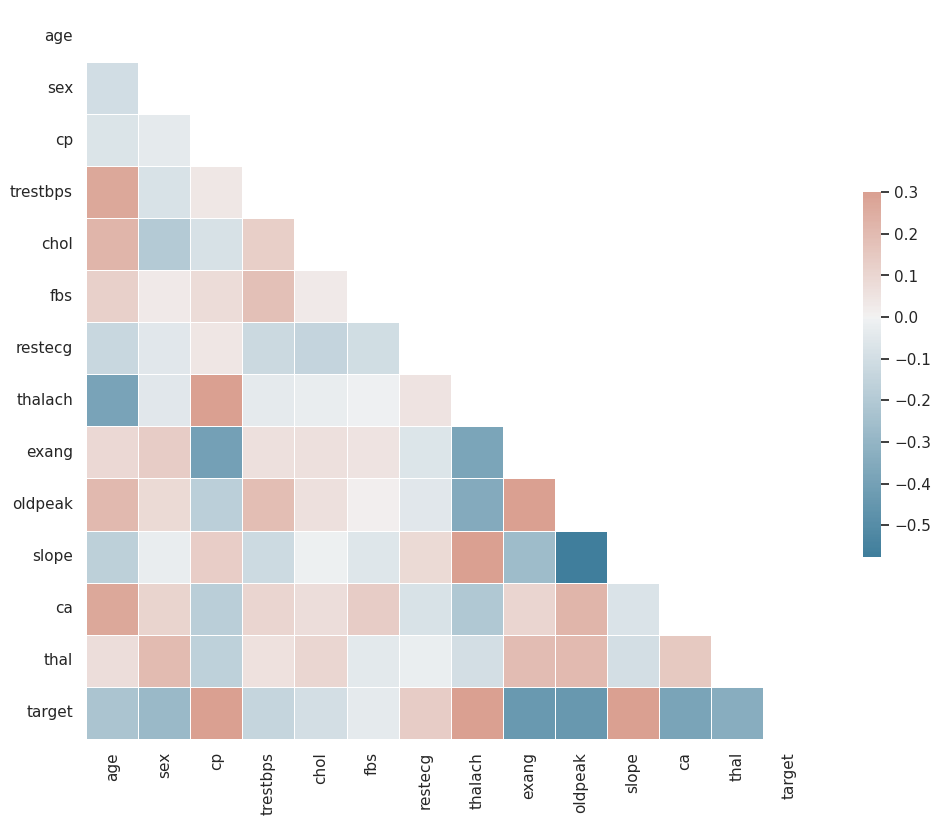

In [ ]:
# Compute the correlation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
data = pd.read_csv('heart.csv')
corr_matrix = data.corr()

sns.set(style="white")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#**Assignment 3**

**Checking OLS Assumption**

In [ ]:
data.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [ ]:
#Multikolinearitas
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('heart.csv')

# Standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(['target'], axis=1))

# Calculate VIF for each independent variable
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Create a DataFrame to display the VIF values
vif_df = pd.DataFrame({'Variable': data.columns[:-1], 'VIF': vif})
print(vif_df)

    Variable       VIF
0        age  1.428872
1        sex  1.155948
2         cp  1.293277
3   trestbps  1.167890
4       chol  1.146047
5        fbs  1.090063
6    restecg  1.064442
7    thalach  1.615182
8      exang  1.419047
9    oldpeak  1.708555
10     slope  1.643092
11        ca  1.197065
12      thal  1.137680


Melalui asumsi multikolinearitas, nilai VIF < 10, sehingga asumsi multikolinearitas terpenuhi**

**Asumsi Heteroskedastisitas**

H0 : tidak terjadi heteroskedastisitas
H1 : terjadi heteroskedastisitas
tolak H0 jika p-value > 0,05

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.compat import lzip
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

y = data['target']
x = data.drop(['target'],axis=1)
X = sm.add_constant(x)

model = sm.Logit(y, X).fit()

# melakukan prediksi pada model
y_pred = model.predict()

_, pvalue, _, f_pvalue = het_breuschpagan(y - y_pred, X)
print('p-value: ', pvalue)
print('F-statistic p-value: ', f_pvalue)


Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7
p-value:  6.8963401058123976e-12
F-statistic p-value:  2.146632109896441e-12


Melalui hasil p-value f statistic sebesar 0,000, didapatkan hasil bahwa lebih kecil dr 0,05 sehingga keputusan  tolak H0 dan memiliki arti bahwa  terjadi heteroskedastisitas, sehingga perlu dilakukan penanganan berupa pembobotan wls

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
data = pd.read_csv('heart.csv')

# Separate predictor variables (X) and target variable (y)
X = data.drop(['target'], axis=1)
y = data['target']

# Calculate weights
squared_residuals = np.square(sm.OLS(y, sm.add_constant(X)).fit().resid)
weights = 1 / squared_residuals

# Fit the WLS model
model = sm.WLS(y, sm.add_constant(X), weights=weights).fit()

# Print model summary
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.913e+05
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:12:22   Log-Likelihood:                 279.12
No. Observations:                1025   AIC:                            -530.2
Df Residuals:                    1011   BIC:                            -461.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7626      0.033     22.925      0.0

Setelah dilakukan pembobotan menggunakan wls, didapatkan nilai p-value sebesar 0,000 yang artinya lebih kecil dr 0,05 sehingga masih memiliki heteroskedastisitas. apabila setelah dilakukan pembobotan masih terdapat kasus heteroskedastisitas, maka dapat dilakukan pemilihan model yg mengabaikan asumsi heteroskedastisitas, seperti regresi logistik, regresi robust dkk

In [ ]:
# Convert sex to categorical variable
data['sex'] = data['sex'].astype('category')

# Convert target to categorical variable
data['target'] = data['target'].astype('category')

# Convert fbs to categorical variable
data['fbs'] = data['fbs'].astype('category')

# Convert exang to categorical variable
data['exang'] = data['exang'].astype('category')

# Convert thal to categorical variable
data['thal'] = data['thal'].astype('category')

# Convert cp to categorical variable
data['cp'] = data['cp'].astype('category')

Menggunakan **Regresi logistik** karena y (target) dan ingin mengklasifikasikan feature yg sekiranya berpengaruh thd penderita jantung

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengubah kolom "sex" menjadi nilai numerik
pd=data
le = LabelEncoder()
pd['sex'] = le.fit_transform(pd['sex'])
# Convert target to numerical variable
pd['target'] = le.fit_transform(pd['target'])

# Convert fbs to numerical variable
pd['fbs'] = le.fit_transform(pd['fbs'])

# Convert exang to numerical variable
pd['exang'] = le.fit_transform(pd['exang'])

# Convert thal to numerical variable
pd['thal'] = le.fit_transform(pd['thal'])

# Convert cp to numerical variable
pd['cp'] = le.fit_transform(pd['cp'])

#Penentuan variabel
y = pd['target']
x = pd.drop(['target'],axis=1)

# Normalize
hasil = ( pd- np.min(pd)) / (np.max(pd) - np.min(pd)).values
hasil

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


*Model Regresi Logistik

H0 : tidak terdapat variabel yg berpengaruh signifikan thd target
H1 : minimal ada 1 variabel yg berpengaruh signifikan thd target
Tolak H0 jika p-value < 0,05

In [ ]:
# Split data into X and y
X = data.drop('target', axis=1)
y = data['target']

# Add constant to X
X = sm.add_constant(X)

# Fit logistic regression model
model1 = sm.Logit(y, X).fit()

# Display model summary
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                  0.4938
Time:                        14:12:32   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.

Melalui nilai p-value, hasil yg didapatkan sebesar 0,000. Sehingga, dapat diputuskan tolak H0 yg artinya minimal ada 1 variabel yg berpengaruh signifikan thd variabel target

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd=data

# Split data into training and testing sets
train_data, test_data = train_test_split(pd, test_size=0.3, random_state=42)

# Prepare data for modeling
y_train = train_data['target']
x_train = train_data.drop(['target'], axis=1)

y_test = test_data['target']
x_test = test_data.drop(['target'], axis=1)

lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 81.17%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Melalui rsq, didapatkan kebaikan model sebesar 81,17%, artinya variabel X yaitu sex, cp, fbs, restecg, exang, oldpeak, slope dan ca dapat menjelaskan variabel y (target) sebesar 81,17%, sedangkan sisanya yaitu 18,83% dapat dijelaskan oleh variabel lain di luar model



In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on training set
predictTrain = lr.predict(x_train)

# Generate confusion matrix using threshold of 0.5
confusionTrain = confusion_matrix(y_train, predictTrain > 0.5)
print('Confusion matrix on training set:')
print(confusionTrain)

# Make predictions on testing set
predictTest = lr.predict(x_test)

# Generate confusion matrix using threshold of 0.5
confusionTest = confusion_matrix(y_test, predictTest > 0.5)
print('Confusion matrix on testing set:')
print(confusionTest)

Confusion matrix on training set:
[[278  62]
 [ 33 344]]
Confusion matrix on testing set:
[[121  38]
 [ 20 129]]


In [ ]:
#Kalkulasi akurasi data train
akurasi_train = (278+344)/len(y_train)
akurasi_train
print("Akurasi data training sebesar {:.2f}%".format(akurasi_train*100))

Akurasi data training sebesar 86.75%


In [ ]:
#Kalkulasi akurasi data test
akurasi_test = (121+129)/len(y_test)
akurasi_test
print("Akurasi data testing sebesar {:.2f}%".format(akurasi_test*100))

Akurasi data testing sebesar 81.17%


**Sekarang, coba menggunakan bootstraping dan feature importance**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# load data into pandas dataframe
df = data

# split data into features and target
x = df.drop('target', axis=1)
y = df['target']

# Create a logistic regression model
logreg = LogisticRegression(random_state=42)

# Cross-validation for feature importance calculation
cv_scores = cross_val_score(logreg, x, y, cv=5)
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score: {:.4f}".format(mean_cv_score))

# Fit the logistic regression model on the entire dataset
logreg.fit(X, y)

# Print feature importances (coefficients)
features = X.columns
for feature, coef in zip(features, logreg.coef_[0]):
    print("{}: {:.4f}".format(feature, coef))

Mean cross-validation score: 0.8449
const: 0.0912
age: 0.0116
sex: -1.6010
cp: 0.8415
trestbps: -0.0147
chol: -0.0044
fbs: -0.1948
restecg: 0.5664
thalach: 0.0320
exang: -0.8886
oldpeak: -0.5317
slope: 0.5480
ca: -0.7425
thal: -0.8688


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

Akurasi sebesar 84,49%
Artinya, model tersebut dapat dengan tepat memprediksi label kelas pada data yang tidak terlihat dengan akurasi sekitar 84,49%.

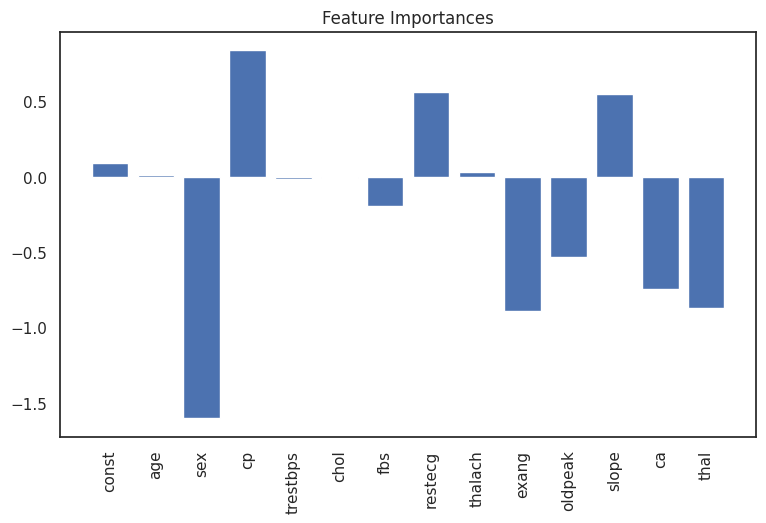

In [ ]:
# visualisasi feature importance
import matplotlib.pyplot as plt

features = X.columns
importances = logreg.coef_[0]
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()

Interpretasi
1. Variabel thalach (maximum heart rate achieved) memiliki pengaruh paling besar terhadap variabel target (penyakit jantung). Hal ini menunjukkan bahwa semakin tinggi detak jantung maksimum yang dapat dicapai oleh seseorang, semakin rendah risiko terkena penyakit jantung.

2. Variabel cp (chest pain type) memiliki pengaruh yang signifikan terhadap variabel target. Hasil ini menunjukkan bahwa jenis nyeri dada yang dirasakan oleh seseorang dapat memberikan indikasi yang baik tentang kemungkinan terkena penyakit jantung.

3. Variabel slope, exang, dan thal memiliki pengaruh yang signifikan terhadap variabel target, meskipun tidak sebesar variabel thalach dan cp.

4. Variabel lainnya seperti age, sex, trestbps, chol, fbs, restecg, dan ca memiliki pengaruh yang lebih rendah terhadap variabel target, dan dapat dianggap sebagai faktor yang kurang signifikan dalam memprediksi kemungkinan terkena penyakit jantung.

**Analisis Menggunakan Random Forest Classifier**


> Alasan menggunakan random forest adalah salah satu pilihan algoritma yang baik untuk melakukan klasifikasi pada target yang bersifat biner (0 atau 1). Kelebihan dari random forest adalah :

Kelebihan dari algoritma random forest adalah sebagai berikut:

1. Mampu mengatasi permasalahan overfitting karena penggunaan banyak pohon keputusan yang dihasilkan secara acak, sehingga dapat mengurangi variansi pada model.

2. Lebih tangguh terhadap data yang noisy atau data yang memiliki fitur yang tidak relevan karena penggunaan banyak pohon keputusan.

3. Dapat menghitung feature importance atau tingkat relevansi dari setiap fitur dalam memprediksi target, sehingga dapat membantu dalam pemilihan fitur yang lebih optimal.

4. Mudah digunakan dan memiliki parameter yang relatif sedikit, sehingga tidak membutuhkan waktu yang lama untuk melakukan tuning parameter.



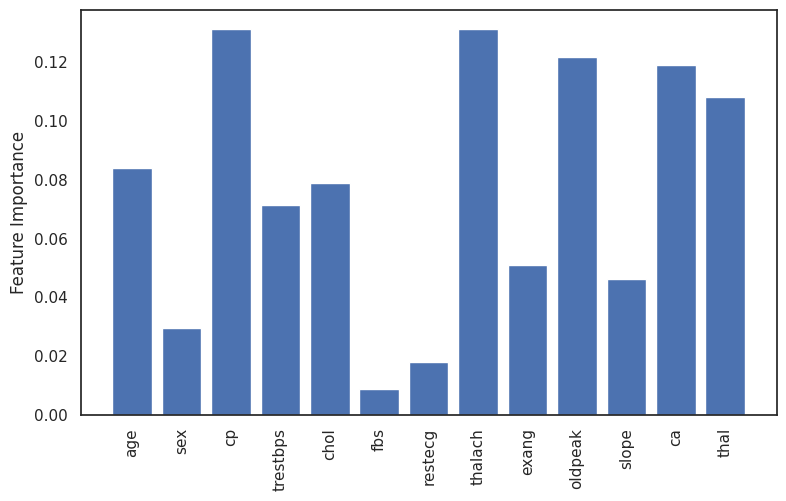

Accuracy: 98.54%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart.csv")

# Split the dataset into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Bootstraping for feature importance calculation
n_iterations = 1000
n_size = int(len(X_train) * 0.8)
features = X.columns
importances = []
for i in range(n_iterations):
    # Resample the training dataset with replacement
    X_train_resample, y_train_resample = resample(X_train, y_train, n_samples=n_size)

    # Fit the model on the resampled dataset
    rf_resample = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_resample.fit(X_train_resample, y_train_resample)

    # Calculate feature importances
    importances_resample = rf_resample.feature_importances_
    importances.append(importances_resample)

# Calculate mean feature importances
mean_importances = np.mean(importances, axis=0)

# Plot feature importances
plt.bar(features, mean_importances)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.show()

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

#**Assignment 4**

Pada assignment 3, kita sudah membandingkan menggunakan metode regresi logistik dengan random forest classifier. Didapatkan akurasi model yang lebih baik ketika menggunakan metode random forest classifier sebesar 98,54%

namun, perbandingan ini hanya dilihat melalui nilai akurasi yang didapatkan antara keduanya. Untuk melalui hasil yang lebih valid, akan dilakukan analisis menggunakan **hyperparameter tuning**

In [ ]:
from sklearn.datasets import make_classification

#Cek struktur dataset
X.shape, y.shape

X memiliki 1025 data dengan 13 kolom
Sedangkan, Y memiliki 1025 data dengan 1 kolom

In [ ]:
X_train.shape, y_train.shape

X memiliki 820 data dengan 13 kolom
Sedangkan, Y memiliki 820 data dengan 1 kolom

In [ ]:
X_test.shape, y_test.shape

((205, 13), (205,))

X memiliki 205 data dengan 13 kolom
Sedangkan, Y memiliki 205 data dengan 1 kolom

In [ ]:
#Hyperparameter tuning menggunakan regresi logistik
# Define hyperparameters to tune
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'penalty': ['l1', 'l2']}

# Create Logistic Regression model
lr = LogisticRegression(random_state=42)

# Perform Grid Search Cross-Validation
grid = GridSearchCV(lr, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid.best_params_)
print("Accuracy Score: {:.2f}%".format(grid.best_score_ * 100))

# Test the model with best hyperparameters on the testing set
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy: {:.2f}%".format(acc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

Best Hyperparameters:  {'C': 10, 'penalty': 'l2'}
Accuracy Score: 85.37%
Test Accuracy: 80.00%
Confusion Matrix:
 [[73 29]
 [12 91]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/mod

Melalui hyperparameter tuning, akurasi model menggunakan regresi logistik sebesar 85,37%, yang selanjutnya dilakukan analisis akurasi model menggunakan random forest classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# Define hyperparameters to tune
params = {'n_estimators': [100, 200, 300, 400, 500],
          'max_features': ['sqrt', 'log2', None],
          'max_depth': [None, 5, 10, 15, 20],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", random_search.best_params_)
print("Accuracy Score: {:.2f}%".format(random_search.best_score_ * 100))

# Test the model with best hyperparameters on the testing set
y_pred = random_search.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy: {:.2f}%".format(acc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy Score: 98.17%
Test Accuracy: 98.54%
Confusion Matrix:
 [[102   0]
 [  3 100]]


Melalui hyperparameter tuning, akurasi model menggunakan random forest classifier sebesar 98,17%, sehingga mengacu pada hasil keduanya, akurasi pada random forest lebih tinggi pada regresi logistik

# Learning curves

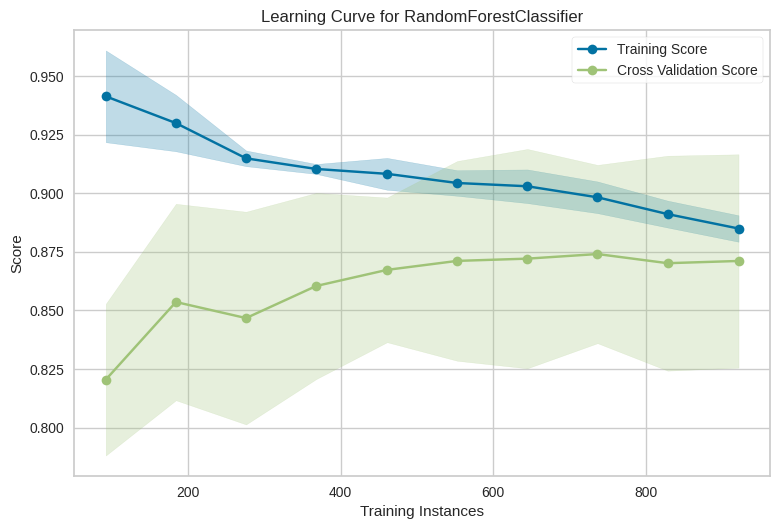

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
#learning curves random forest
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from yellowbrick.model_selection import LearningCurve
# Create Random Forest model
rcf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# Plot learning curve
cv = 10
sizes = np.linspace(0.1, 1.0, 10)
lc_viz = LearningCurve(rcf, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
lc_viz.fit(X, y)
lc_viz.show()

Melalui plot, dapat disimpulkan bahwa perbedaan antara akurasi pelatihan dan validasi jauh lebih sedikit daripada model yang di-overfit.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

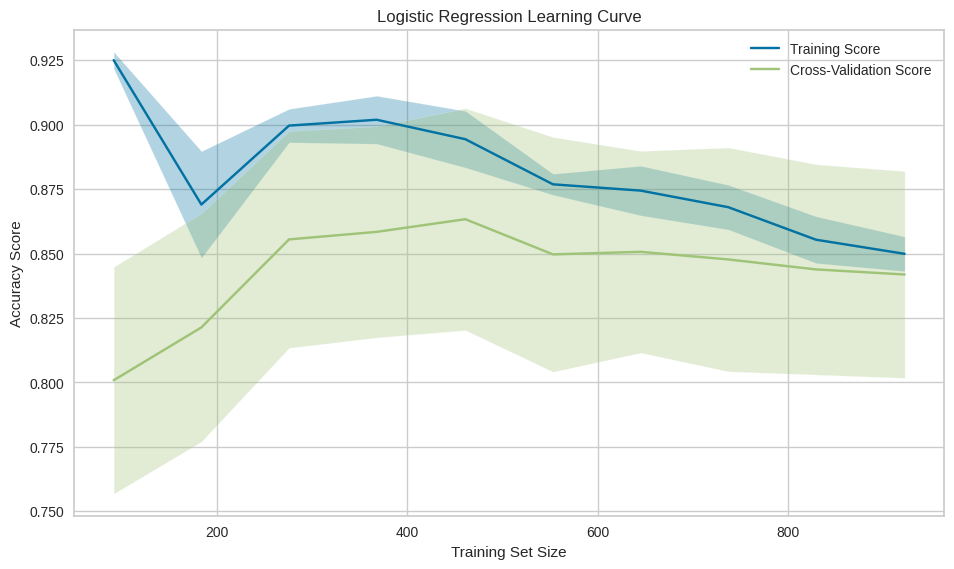

In [ ]:
#learning curve menggunakan regresi logistik
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
# Create Logistic Regression model
lr = LogisticRegression(random_state=0)

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores using cross-validation
train_sizes_abs, train_scores, test_scores = learning_curve(lr, X, y, cv=10, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the train and test scores for each training set size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_mean, label='Training Score')
plt.plot(train_sizes_abs, test_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

#Analisis menggunakan ROC

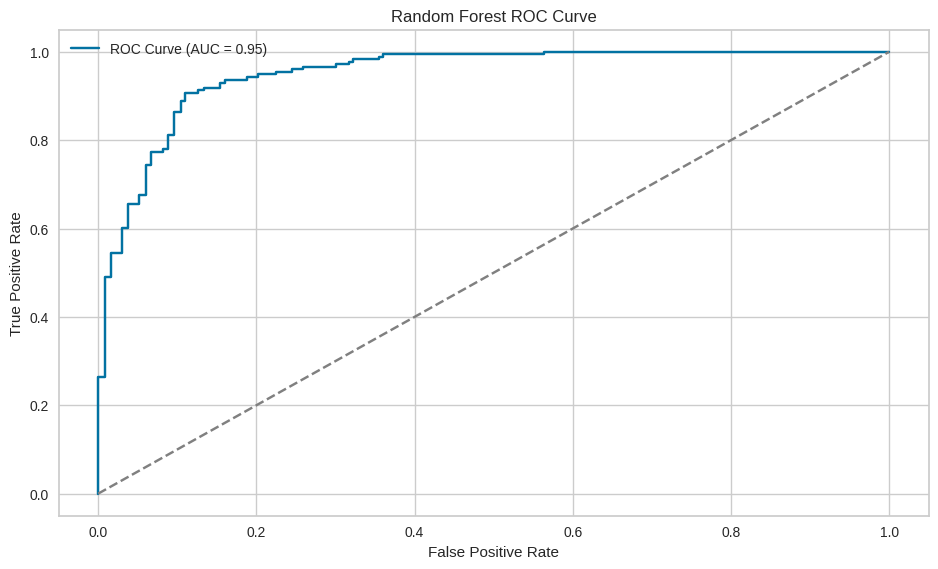

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Create Random Forest model
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# Fit the model
rfc.fit(X, y)

# Calculate predicted probabilities for the positive class
y_proba = rfc.predict_proba(X)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y, y_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



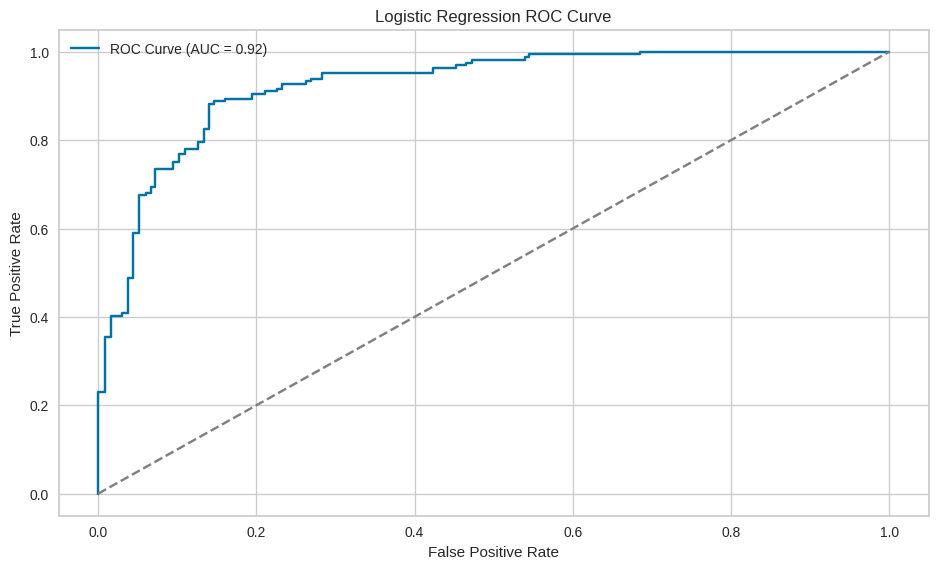

In [ ]:
#ROC curve logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create Logistic Regression model
lr = LogisticRegression()

# Fit the model
lr.fit(X, y)

# Calculate predicted probabilities for the positive class
y_proba = lr.predict_proba(X)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y, y_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Setelah melalui dua analisis menggunakan regresi logistik dan random forest classifier, didapatkan hasil bahwa pemodelan lebih baik menggunakan random forest karena memiliki nilai akurasi lebih tinggi dibandingkan pemodelan menggunakan regresi logistik